# Traveling Salesman Problem

Solved using QUBO on DWave's direct QPU sampler and classical solver

In [1]:
import time

import numpy as np
import networkx as nx

from numpy import random
from dwave_networkx.algorithms.tsp import traveling_salesperson_qubo, traveling_salesperson
from dwave.system import LazyEmbeddingComposite, DWaveSampler, AutoEmbeddingComposite

import dimod
import dwave.inspector

## Generate problem

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


{(0, 1): Text(0.654508476093664, 0.47552828417802706, '1'),
 (0, 2): Text(0.09549147175227024, 0.2938926307527015, '1'),
 (0, 3): Text(0.09549150155459352, -0.2938926605550248, '2'),
 (0, 4): Text(0.6545085505994722, -0.4755282543757038, '5'),
 (1, 2): Text(-0.25000005215406573, 0.7694209149307285, '7'),
 (1, 3): Text(-0.25000002235174246, 0.18163562362300228, '6'),
 (1, 4): Text(0.3090170266931363, 2.980232327587373e-08, '7'),
 (2, 3): Text(-0.8090170266931362, -2.980232327587373e-08, '7'),
 (2, 4): Text(-0.24999997764825752, -0.18163562362300228, '6'),
 (3, 4): Text(-0.24999994784593424, -0.7694209149307285, '3')}

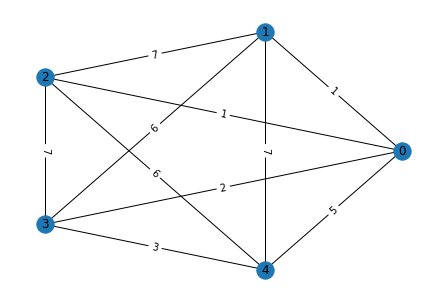

In [2]:
# generate random graph
# number of nodes
num_nodes = 5
# edge generation probability
p = 1
# seed (optional)
seed = 50
random.seed(seed)
#generate graph
graph = nx.gnp_random_graph(num_nodes,p,seed)

for (u, v) in graph.edges():
    graph.edges[u,v]['weight'] = random.randint(1,10)
    
print(graph.edges)
# draw graph
pos = nx.circular_layout(graph)
nx.draw(graph, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)

## Generate QUBO

In [3]:
# generate qubo
qubo = traveling_salesperson_qubo(graph, weight='weight')
# traveling_salesperson(graph, dimod.ExactSolver(), weight='weight')

## Solve with QPU

In [6]:
start = time.time()
# run QPU solver
sampler = LazyEmbeddingComposite(DWaveSampler())
response = sampler.sample_qubo(qubo, num_reads=5000, label='BQM TSP')
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)
print(response.first.sample, response.first.energy)

Solved in 3.54 seconds
{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 1, (0, 4): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 0, (1, 4): 1, (2, 0): 0, (2, 1): 0, (2, 2): 1, (2, 3): 0, (2, 4): 0, (3, 0): 1, (3, 1): 0, (3, 2): 0, (3, 3): 0, (3, 4): 0, (4, 0): 0, (4, 1): 1, (4, 2): 0, (4, 3): 0, (4, 4): 0} -208.0


In [7]:
solution = response.first.sample
for i in solution:
    if solution[i] > 0.5:
        print(i)
        
dist = 0
for i,j in solution:
    if solution[(i,j)]>0.5:
        print(i,j)
        dist += graph[i][j]['weight']
        
print(dist)

(0, 3)
(1, 4)
(2, 2)
(3, 0)
(4, 1)
0 3
1 4
2 2


KeyError: 2

In [6]:
dwave.inspector.show(response)

Exception in thread Thread-5:
Traceback (most recent call last):
  File "C:\Users\Josh\anaconda3\lib\site-packages\dwave\inspector\server.py", line 119, in _make_server
    import dwave._inspectorapp as webappdata
ModuleNotFoundError: No module named 'dwave._inspectorapp'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Josh\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Josh\anaconda3\lib\site-packages\dwave\inspector\server.py", line 155, in run
    self.server.serve_forever()
  File "C:\Users\Josh\anaconda3\lib\site-packages\dwave\inspector\server.py", line 141, in server
    self._server = self._make_server()
  File "C:\Users\Josh\anaconda3\lib\site-packages\dwave\inspector\server.py", line 121, in _make_server
    raise RuntimeError(
RuntimeError: Cannot use the problem inspector without a non-open-source 'inspector' application component. Try running 'dwave install

RuntimeError: Cannot use the problem inspector without a non-open-source 'inspector' application component. Try running 'dwave install inspector' or consult the documentation.

## Redraw graph with solution

In [ ]:
for i,j in solution:
    if (i,j) in graph.edges:
        graph[i][j]['color'] = 'blue'
    if solution[(i,j)] > 0.5 or solution[(j,i)]:
        graph[i][j]['color'] = 'red'
        
edges = graph.edges()
colors = [graph[u][v]['color'] for u,v in edges]
weights = [graph[u][v]['weight'] for u,v in edges]

# draw
nx.draw(graph, pos, edges=edges, edge_color=colors, with_labels=True)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)

## Solve with Simulated Annealing

In [ ]:
start = time.time()
sampler1 = dimod.SimulatedAnnealingSampler()
response1 = sampler1.sample_qubo(qubo)
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)
solution1 = response1.first.sample
print(response1.first)

In [ ]:
for i in solution1:
    if solution1[i] > 0.5:
        print(i)
        
dist = 0
for i,j in solution1:
    if solution1[(i,j)]>0.5:
        dist += graph[i][j]['weight']
        
print(dist)

## Redraw graph with solution

In [ ]:
for i,j in solution1:
    if (i,j) in graph.edges:
        graph[i][j]['color'] = 'blue'
    if solution[(i,j)] > 0.5 or solution[(j,i)]:
        graph[i][j]['color'] = 'red'
        
edges = graph.edges()
colors = [graph[u][v]['color'] for u,v in edges]
weights = [graph[u][v]['weight'] for u,v in edges]

# draw
nx.draw(graph, pos, edges=edges, edge_color=colors, width=weights, with_labels=True)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)